In [1]:
import pandas as pd
import unicodedata
import re


data = pd.read_csv('input/amazon_alexa.tsv', delimiter = '\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [2]:
data.isnull().sum() # check any Missing Values

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [3]:
data.describe() #  check Descriptive Summary
data.describe(include = 'object') # Date, Variation and Reviews

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [4]:
data['variation'].value_counts() # Value Counts for Variation 

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

### 1. Words Count : Characters, and Punctuation 

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
data['char_count'] = data['verified_reviews'].apply(len) 
data['char_count'].head() # CharacterCount (字數 Len)

0     13
1      9
2    195
3    172
4      5
Name: char_count, dtype: int64

In [7]:
data['word_count'] = data['verified_reviews'].apply(lambda x: len(x.split()))
data['word_count'].head() # Word Count(段落)

0     3
1     2
2    38
3    34
4     1
Name: word_count, dtype: int64

In [8]:
# Calculating the Word Density
data['word_density'] = data['char_count'] / (data['word_count']+1)
data['word_density'].head()

0    3.250000
1    3.000000
2    5.000000
3    4.914286
4    2.500000
Name: word_density, dtype: float64

In [9]:
# Calculating the Punctuation Count
import string
punctuation = string.punctuation
data['punctuation_count'] = data['verified_reviews'].apply(
    lambda x:len("".join(_ for _ in x if _ in punctuation))) 
data['punctuation_count'].head()

0    1
1    1
2    3
3    4
4    0
Name: punctuation_count, dtype: int64

In [10]:
# summarize the Newly Created Features
data[['char_count','word_count','word_density','punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049524,25.293016,4.605345,3.887937
std,182.099952,34.584971,1.134737,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


## 2.SpeechDictionary

In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback,char_count,word_count,word_density,punctuation_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,3.250000,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,3.000000,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,5.000000,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,4.914286,4
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,2.500000,0


In [12]:
# lets create a Part of speech Dictionary
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['Love','VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['Enjoy','JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

### Adjectives (adj)

In linguistics, an adjective is a word that modifies a noun or noun phrase or describes its referent. Its semantic role is to change information given by the noun. Adjectives are one of the main parts of speech of the English language, although historically they were classed together with nouns.

In [13]:
# lets calculate the Count of Adjectives in the Text
data['adj_count'] = data['verified_reviews'].apply(
    lambda x: pos_check(x, 'adj'))
data['adj_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: adj_count, dtype: int64

### Adverbs (adv)

An adverb is a word or an expression that modifies a verb, adjective, another adverb, determiner, clause, preposition, or sentence. Adverbs typically express manner, place, time, frequency, degree, level of certainty, etc., answering questions such as how?, in what way?, when?, where?, and to what extent?

In [14]:
# lets calculate the count of Adverbs in the Text
data['adv_count'] = data['verified_reviews'].apply(
    lambda x: pos_check(x, 'adv'))
data['adv_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: adv_count, dtype: int64

 ### Pronouns

A pronoun (I, me, he, she, herself, you, it, that, they, each, few, many, who, whoever, whose, someone, everybody, etc.) is a word that takes the place of a noun. In the sentence Joe saw Jill, and he waved at her, the pronouns he and her take the place of Joe and Jill, respectively.

In [15]:
# lets calculate the count of Pronouns in the Text
data['pron_count'] = data['verified_reviews'].apply(
    lambda x: pos_check(x, 'pron'))
data['pron_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: pron_count, dtype: int64

### Nouns (N)

A noun is a word that functions as the name of a specific object or set of objects, such as living creatures, places, actions, qualities, states of existence, or ideas. However, noun is not a semantic category, so that it cannot be characterized in terms of its meaning.

In [16]:
# lets calculate the count of Nouns in the Text
data['noun_count'] = data['verified_reviews'].apply(
    lambda x: pos_check(x, 'noun'))
data['noun_count'] .head()

0    0
1    0
2    0
3    0
4    0
Name: noun_count, dtype: int64

### Verbs (vb)

A verb, from the Latin verbum meaning word, is a word that in syntax conveys an action, an occurrence, or a state of being. In the usual description of English, the basic form, with or without the particle to, is the infinitive. In many languages, verbs are inflected to encode tense, aspect, mood, and voice.

In [17]:
# lets calculate the count of Verbs in the Text
data['verb_count'] = data['verified_reviews'].apply(
    lambda x: pos_check(x, 'verb'))
data['verb_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: verb_count, dtype: int64

In [18]:
# summarize
data[['adj_count','adv_count','pron_count','noun_count','verb_count']].describe()

,adj_count,adv_count,pron_count,noun_count,verb_count
count,3150.0,3150.0,3150.0,3150.0,3150.0
mean,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


## 3.Removing Accented Characters (重音節)

Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. 

：Word as résumé, café, prótest, divorcé, coördinate, exposé, latté etc

In [19]:
data.head()

,rating,date,variation,verified_reviews,feedback,char_count,word_count,word_density,punctuation_count,adj_count,adv_count,pron_count,noun_count,verb_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3,3.250000,1,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2,3.000000,1,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,38,5.000000,3,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,34,4.914286,4,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,2.500000,0,0,0,0,0,0


In [20]:
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
data['verified_reviews'] = data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis = 1)
data['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

### Removing Special Characters

Special characters, as you know, are non-alphanumeric characters. These characters are most often found in comments, references, currency numbers etc. These characters add no value to text-understanding and induce noise into algorithms. Thankfully, regular-expressions (regex) can be used to get rid of these characters and numbers.

In [21]:
# Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
data['verified_reviews'] = data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis = 1)
data['verified_reviews'].head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

## 4. Cleaning Punctuations and Numbers

In [22]:
data.head()

,rating,date,variation,verified_reviews,feedback,char_count,word_count,word_density,punctuation_count,adj_count,adv_count,pron_count,noun_count,verb_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13,3,3.250000,1,0,0,0,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9,2,3.000000,1,0,0,0,0,0
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer...,1,195,38,5.000000,3,0,0,0,0,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My 4 ...,1,172,34,4.914286,4,0,0,0,0,0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1,2.500000,0,0,0,0,0,0


In [23]:
# remove Punctuations 刪除標點符號

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['verified_reviews'] = data['verified_reviews'].apply(punctuation_removal)
data['verified_reviews'].head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [24]:
# remove Numbers 刪除數字
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews'] = data['verified_reviews'].apply(drop_numbers)
data['verified_reviews'] .head()

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My  y...
4                                                Music
Name: verified_reviews, dtype: object

In [25]:
# lets visualize the Top 10 Reviews after Removal of Punctuations and Numbers
data['verified_reviews'].head(10)

0                                        Love my Echo 
1                                            Loved it 
2    Sometimes while playing a game  you can answer...
3    I have had a lot of fun with this thing  My  y...
4                                                Music
5    I received the echo as a gift  I needed anothe...
6    Without having a cellphone  I cannot use many ...
7    I think this is the th one I ve purchased  I m...
8                                          looks great
9    Love it  Ive listened to songs I havent heard ...
Name: verified_reviews, dtype: object

## 5.Polarity Subjectivity

In [28]:
!pip install textblob

### Text Polarity (情感分析)

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [34]:
from textblob import TextBlob

def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

data['polarity'] = data['verified_reviews'].apply(get_polarity)
data['polarity'].head()

0    0.50
1    0.70
2   -0.10
3    0.35
4    0.00
Name: polarity, dtype: float64

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [31]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

In [33]:
## summarize
data[['polarity','subjectivity']].describe()

,polarity,subjectivity
count,3150.000000,3150.000000
mean,0.333889,0.531413
std,0.282654,0.256219
min,-1.000000,0.000000
25%,0.120982,0.425000
50%,0.348131,0.589435
75%,0.500000,0.695579
max,1.000000,1.000000


In [36]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


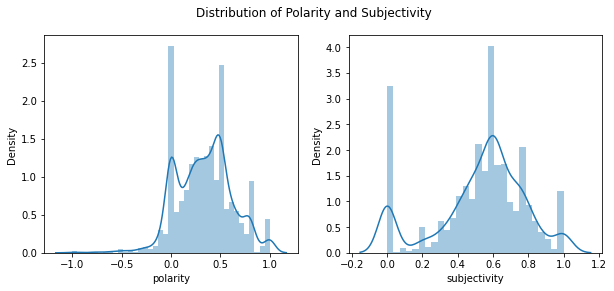

In [37]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

C:\Users\cti110016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


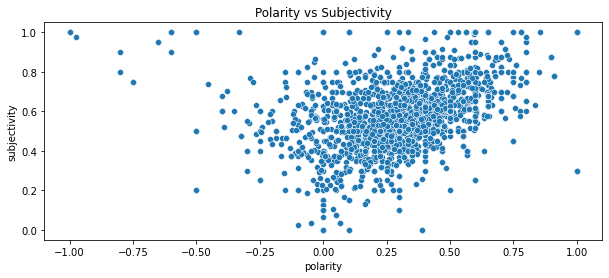

In [38]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()